In [1]:
# Import necessary libraries
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from model.maxsr_super_tiny import *

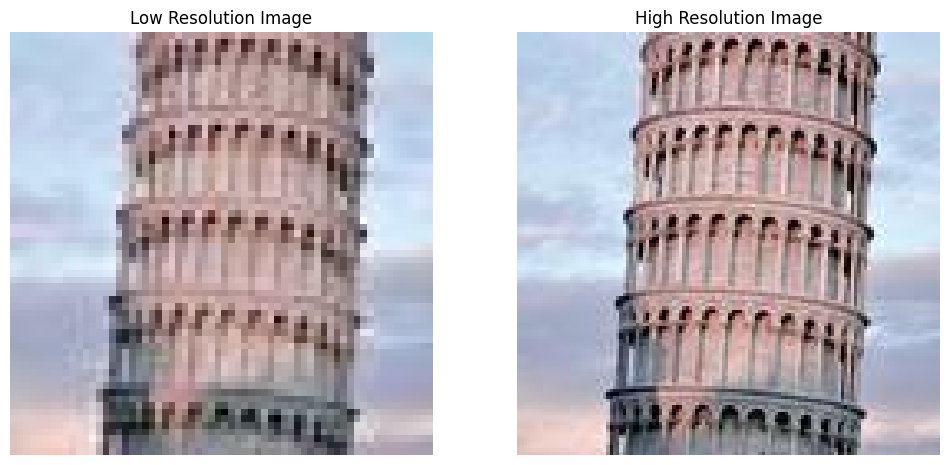

In [2]:
# Load the images
lr_image_path = '/home/linuxu/Documents/datasets/Tiny_LR/21.jpeg'  
hr_image_path = '/home/linuxu/Documents/datasets/Tiny_HR/21.jpeg'  

lr_image = Image.open(lr_image_path)
hr_image = Image.open(hr_image_path)

# Plot the images side by side
plt.figure(figsize=(12, 6))

# Plot Low Resolution Image
plt.subplot(1, 2, 1)
plt.imshow(lr_image)
plt.title('Low Resolution Image')
plt.axis('off')

# Plot High Resolution Image
plt.subplot(1, 2, 2)
plt.imshow(hr_image)
plt.title('High Resolution Image')
plt.axis('off')

plt.show()

In [13]:
# Transform the image to tensor
transform = transforms.ToTensor()
image_tensor = transform(lr_image).unsqueeze(0)

# Output the shape of the tensor
print(f'The shape of the low resolution tensor is: {image_tensor.shape}')

The shape of the low resolution tensor is: torch.Size([1, 3, 64, 64])


In [14]:
sfeb = ShallowFeatureExtractor()
sfeb_output = sfeb(image_tensor)

# SFEB OUTPUT

In [15]:
sfeb_output.shape

torch.Size([1, 64, 64, 64])

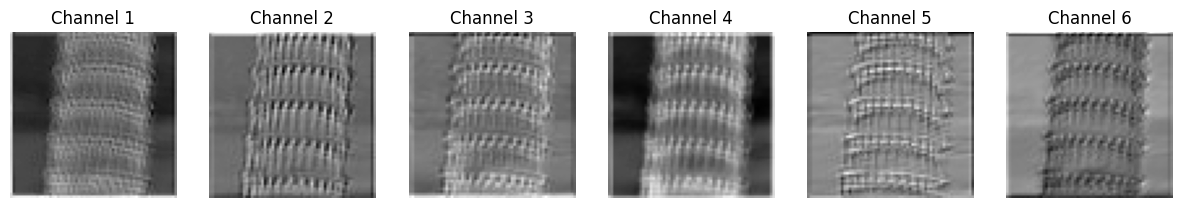

In [16]:
# Plot some of the channels
num_channels_to_plot = 6  # Adjust this to plot more or fewer channels
plt.figure(figsize=(15, 10))

for i in range(num_channels_to_plot):
    plt.subplot(1, num_channels_to_plot, i+1)
    plt.imshow(sfeb_output[0, i].detach().numpy(), cmap='gray')
    plt.title(f'Channel {i+1}')
    plt.axis('off')

plt.show()

# Patches

In [28]:
# Step 2: Extract Patches
patch_size = 8
patches = extract_patches(sfeb_output, patch_size)

In [29]:
patches.shape

torch.Size([1, 64, 64, 8, 8])

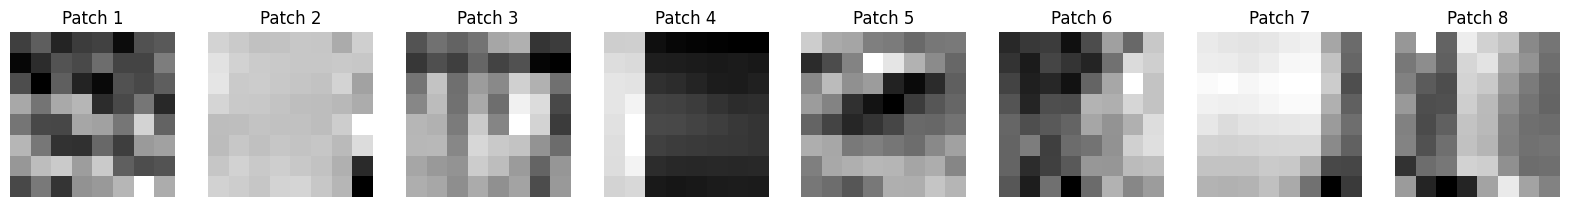

In [32]:
# Assuming patches have shape (1, 64, 64, 8, 8)
# Remove the batch dimension
patches = patches.squeeze(0)  # Shape is now (64, 64, 8, 8)

# Plot some of the patches
num_patches_to_plot = 8  # Adjust this number to plot more or fewer patches
plt.figure(figsize=(20, 5))

for i in range(num_patches_to_plot):
    # Select a patch and a random channel (e.g., channel 0)
    random_channel = torch.randint(0, patches.shape[1], (1,)).item()
    patch = patches[i, random_channel, :, :]  # Select the i-th patch and a random channel
    plt.subplot(1, num_patches_to_plot, i + 1)
    plt.imshow(patch.detach().cpu().numpy(), cmap='gray')
    plt.title(f'Patch {i+1}')
    plt.axis('off')

plt.show()

# Adaptive MaxVit Block